<h1><u>Analytic Report</u></h1>

<h3><u>We have three questions:</u></h3>
<ol>
   <li>How does blood pressure and cholesterol relate to each other?</li>
   <li>Do men tend to have higher blood pressure than women? What about cholesterol?</li>
   <li>What contribute to causing heart disease (age, cholesterol, blood pressure)? Is it the effect the same for both sex (male and female)?</li>
</ol>

<h3><u>With dataset is given</u></h3>

In [39]:
import pandas as pd
import scipy as scipy
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
#import plotly.plotly as pl 


In [40]:
data_frame = pd.read_excel(io ='E:\Python\Machine-Learning-Course\Assignment\Analytic Project\Cardiology.xls',
                          sheetname = 'Sheet1', header = 0, skiprows = [1, 2])

In [41]:
data_frame.head(8) #print 8 rows of data_frame

,age,sex,chest pain type,blood pressure,cholesterol,Fasting blood sugar <120,resting ecg,maximum heart rate,angina,peak,slope,#colored vessels,thal,class
0,60,1,4,130,206,0,2,132,1,2.4,2,2,7,0
1,49,1,2,130,266,0,0,171,0,0.6,1,0,3,1
2,64,1,1,110,211,0,2,144,1,1.8,2,0,3,1
3,63,1,4,130,254,0,2,147,0,1.4,2,1,7,0
4,53,1,4,140,203,1,2,155,1,3.1,3,0,7,0
5,58,0,1,150,283,1,2,162,0,1.0,1,0,3,1
6,58,1,2,120,284,0,2,160,0,1.8,2,0,3,0
7,58,1,3,132,224,0,2,173,0,3.2,1,2,7,0


<h3><u>Some statictis data from data_frame</u></h3>

In [42]:
data_frame = data_frame[['age', 'sex', 'blood pressure', 'cholesterol','class']]
data_frame.describe()

,age,sex,blood pressure,cholesterol,class
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,131.623762,246.264026,0.544554
std,9.082101,0.466011,17.538143,51.830751,0.498835
min,29.000000,0.000000,94.000000,126.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,1.000000
75%,61.000000,1.000000,140.000000,274.500000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000


<h2><u>Problem 1:</u></h2>
<h3><u>How does blood pressure and cholesterol relate to each other?</u></h3>

From data is given, we can display relationship between blood pressure and cholesterol as the following plot:

In [43]:
blood_pressure = data_frame['blood pressure']
cholesterol = data_frame['cholesterol']

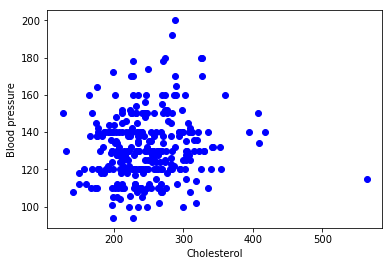

In [44]:
# We visualize relationship between blood pressure and cholesterol
plt.xlabel('Cholesterol')
plt.ylabel('Blood pressure')
plt.plot(cholesterol, blood_pressure, 'bo')
plt.show()

We will calculate the correlation coefficient between cholesterol and blood pressure

In [45]:
rel_cho_blp = blood_pressure.corr(cholesterol)
print('Correlation coefficent = {}' .format(rel_cho_blp))

Correlation coefficent = 0.12317420653239072


<h3><i>From the plot, we couldn't see the definite trend 
in increasing or descending, and the correlation coefficient 
is quite small.Based on this dataset, we surely confirm there 
is no relation between cholesterol and blood pressure. </i></h3>

<h2><u>Problem 2:</u></h2>
<h3><u>Do men tend to have higher blood pressure than women? What about cholesterol?</u></h3>

<strong>From the questions, we create some hypothesizes to test:</strong>

<p>H<sub>0a</sub>: men don't have higher blood pressure than women </p>
<p>H<sub>1a</sub>: men have higher blood pressure than women</p>

<p>H<sub>0b</sub>: men don't have higher cholesterol than women </p>
<p>H<sub>1b</sub>: men have higher blood cholesterol than women</p>

In [46]:
male = data_frame[data_frame['sex']== 1]
female = data_frame[data_frame['sex']== 0]

<strong>We run two t-test for two hypothesizes with results:  </strong>

In [47]:
result_a = ttest_ind(male['blood pressure'], female['blood pressure'])
result_b = ttest_ind(male['cholesterol'], female['cholesterol'])

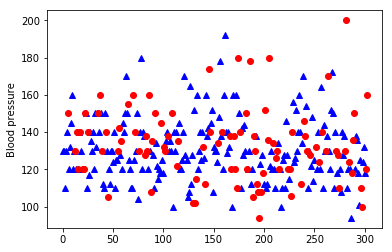

In [48]:
plt.ylabel('Blood pressure')
plt.plot(male['blood pressure'], 'b^')
plt.plot(female['blood pressure'], 'ro')
plt.show()

<p>P value from the test A: </p>

In [49]:
print('pvalue = {}'.format(result_a.pvalue))

pvalue = 0.3246834797221041


<strong>With probability of H<sub>0a</sub> is pvalue > 0.005, so we cannot reject it</strong>

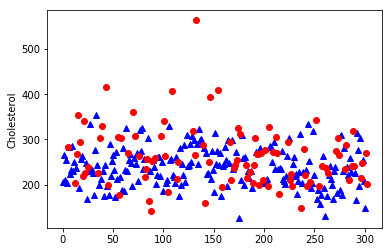

In [50]:
plt.ylabel('Cholesterol')
plt.plot(male['cholesterol'], 'b^')
plt.plot(female['cholesterol'], 'ro')
plt.show()

<p>P value from the test B: </p>

In [51]:
print('pvalue = {}'.format(result_b.pvalue))

pvalue = 0.000529966610622664


<strong>With probability of H<sub>0b</sub> is pvalue < 0.005, so we can reject it.</strong>

<h3><i>From the results based on this dataset, we can conclude that men have higher blood pressure than women but not sure about cholesterol.</i></h3>

<h2><u>Problem 2:</u></h2>
<h3><u>What contribute to causing heart disease (age, cholesterol, blood pressure)? Is it the effect the same for both sex (male and female)?</u></h3>

<h3><i>We survey relations between men's heart disease with conditions(age, cholesterol, blood pressure)</i></h3>

<strong>We make some hypothesizes to test: </strong>
<p>H<sub>0age</sub>: age don't effect to men's heart disease</p>
<p>H<sub>0cholesterol</sub>: cholesterol don't effect to men's heart disease</p>
<p>H<sub>0pressure</sub>: blood pressure don't effect to men's heart disease</p>

<strong> T-test for each cases are:</strong>

In [52]:
men_age_heart_disease = ttest_ind(data_frame['age'][data_frame['sex'] == 1][data_frame['class']==1], 
                                  data_frame['age'][data_frame['sex'] == 1][data_frame['class']==0]).pvalue
print('pvalue in age case: {} < 0.05'.format(men_age_heart_disease))

pvalue in age case: 2.102442577307712e-05 < 0.05


In [53]:
men_cholesterol_heart_disease = ttest_ind(data_frame['cholesterol'][data_frame['sex'] == 1][data_frame['class']==1], 
                                          data_frame['cholesterol'][data_frame['sex'] == 1][data_frame['class']==0]).pvalue
print('pvalue in cholesterol case: {} < 0.05'.format(men_cholesterol_heart_disease))

pvalue in cholesterol case: 0.011348054524752035 < 0.05


In [54]:
men_pressure_heart_disease = ttest_ind(data_frame['blood pressure'][data_frame['sex'] == 1][data_frame['class']==1], 
                                       data_frame['blood pressure'][data_frame['sex'] == 1][data_frame['class']==0]).pvalue
print('pvalue in blood pressure case: {} > 0.05'.format(men_pressure_heart_disease))

pvalue in blood pressure case: 0.3484860467059646 > 0.05


<strong>From results, we have some conclusions:</strong>
<p>Age effect to men's heart disease</p>
<p>Cholesterol effect to men's heart disease</p>
<p>Blood pressure don't effect to men's heart disease</p>

<h3><i>We survey relations between men's heart disease with conditions(age, cholesterol, blood pressure)</i></h3>

<strong>We make some hypothesizes to test: </strong>
<p>H<sub>0age</sub>: age don't effect to women's heart disease</p>
<p>H<sub>0cholesterol</sub>: cholesterol don't effect to women's heart disease</p>
<p>H<sub>0pressure</sub>: blood pressure don't effect to women's heart disease</p>

<strong> T-test for each cases are:</strong>

In [55]:
women_age_heart_disease = ttest_ind(data_frame['age'][data_frame['sex'] == 0][data_frame['class']==1], 
                                    data_frame['age'][data_frame['sex'] == 0][data_frame['class']==0]).pvalue
print('pvalue in age case: {} < 0.05'.format(women_age_heart_disease))

pvalue in age case: 0.042469631102719105 < 0.05


In [56]:
women_cholesterol_heart_disease = ttest_ind(data_frame['cholesterol'][data_frame['sex'] == 0][data_frame['class']==1], 
                                            data_frame['cholesterol'][data_frame['sex'] == 0][data_frame['class']==0]).pvalue
print('pvalue in cholesterol case: {} > 0.05'.format(women_cholesterol_heart_disease))

pvalue in cholesterol case: 0.2372594614368495 > 0.05


In [57]:
women_pressure_heart_disease = ttest_ind(data_frame['blood pressure'][data_frame['sex'] == 0][data_frame['class']==1], 
                                         data_frame['blood pressure'][data_frame['sex'] == 0][data_frame['class']==0]).pvalue
print('pvalue in blood pressure case: {} < 0.05'.format(women_pressure_heart_disease))

pvalue in blood pressure case: 7.837377824823497e-05 < 0.05


<strong>From results, we have some conclusions:</strong>
<p>Age effect to women's heart disease</p>
<p>Cholesterol don't effect to women's heart disease</p>
<p>Blood pressure effect to women's heart disease</p>

<h3><i>From two surveys, we temporarily conclude some reasons causing heart disease:</i></h3>
<table>
  <tr>
    <th>Sex</th>
    <th>Age</th>
    <th>Cholesterol</th>
    <th>Blood pressure</th>
  </tr>
  <tr>
    <td>Male</td>
    <td>Yes</td>
    <td>Yes</td>
    <td>No</td>
  </tr>
  <tr>
    <td>Female</td>  
    <td>Yes</td>
    <td>No</td>
    <td>Yes</td>
  </tr>
</table>
